In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

from astropy import units as u
from astropy.coordinates import (SkyCoord, Distance, Galactic,EarthLocation, AltAz)
import astropy.coordinates as coord
from astropy.wcs import WCS

from astropy.time import Time
from astropy.io import fits
from astropy.table import QTable,Table
from astropy.utils.data import download_file

from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = 10000  # Set the row limit for returned data

## NGC 188

In [2]:
ngc188_center = SkyCoord(12.11*u.deg, 85.26*u.deg,distance=1.96*u.kpc, frame='icrs')
#SkyCoord.from_name() 
ngc188_center

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (12.11, 85.26, 1.96)>

In [11]:
type(ngc188_center.ra),type(ngc188_center.dec)

(astropy.coordinates.angles.Longitude, astropy.coordinates.angles.Latitude)

In [5]:
SkyCoord('00h48m26.4s', '85d15m36s', frame='icrs') #sexagesimal sky coordinate

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

In [6]:
SkyCoord('00:48:26.4 85:15:36', unit=(u.hour, u.deg),frame='icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

In [10]:
job = Gaia.cone_search_async(ngc188_center, radius=0.5*u.deg)
ngc188_table = job.get_results()

# only keep stars brighter than G=19 magnitude
#ngc188_table = ngc188_table[ngc188_table['phot_g_mean_mag'] < 19*u.mag]

INFO: Query finished. [astroquery.utils.tap.core]


In [14]:
cols = ['source_id',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag']
ngc188_table[cols].write('gaia_results.fits', overwrite=True)

In [3]:
ngc188_table = QTable.read('gaia_results.fits')

In [4]:
len(ngc188_table)

10000

In [4]:
ngc188_table['ra']

<Quantity [12.12843989, 12.12080548, 12.07377356, ...,  7.49357257,
           13.70775081, 15.27881919] deg>

In [5]:
ngc188_table['dec']

<Quantity [85.26076889, 85.26217425, 85.26028909, ..., 84.96088829,
           84.78575005, 85.68625042] deg>

In [5]:
ngc188_gaia_coords = SkyCoord(ngc188_table['ra'], ngc188_table['dec'])
ngc188_gaia_coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(12.12843989, 85.26076889), (12.12080548, 85.26217425),
     (12.07377356, 85.26028909), ..., ( 7.49357257, 84.96088829),
     (13.70775081, 84.78575005), (15.27881919, 85.68625042)]>

In [6]:
parallax_snr = ngc188_table['parallax'] / ngc188_table['parallax_error']
ngc188_table_3d = ngc188_table[parallax_snr > 10]
len(ngc188_table_3d)

C:\ProgramData\Anaconda3\lib\site-packages\astropy\units\quantity.py:466: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2069

In [16]:
ngc188_table_3d

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,
int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64
1635721458409799680,Gaia DR2 573942909332943360,573942909332943360,796957386,2015.5,12.12843989475989,0.02163973346276928,85.26076889159741,0.016972325555195008,0.544762179500299,0.02116167140041043,25.74287,-2.062848508773472,0.04457544691630277,-0.9278057621660916,0.031691023022248875,-0.04787398,0.084106684,-0.37965998,0.08444537,0.17783234,0.053481597,-0.16876398,0.042354006,0.3147502,-0.12727459,231,0,230,1,-1.0725403,202.38441,0.0,0.0,31,False,28.744633,1.5935563791120348,0.005419620960123071,0.045180418,27,18,0.05406891,0,31,False,264,23118.940858546033,6.4218508346316705,3600.0432,14.778446,29,12027.0471989583,22.167310848549878,542.5578,15.1509905,27,16061.889914483643,25.150099597247262,638.64124,14.247428,1.2149751,0,0.90356255,0.3725443,0.53101826,--,--,0,--,--,--,NOT_AVAILABLE,122.86659825914313,22.389389773581676,78.91630791355836,65.15398234944396,100001,5458.0,5402.5903,5574.0,--,--,--,--,--,--,200111,1.9879992,1.906116,2.0289867,3.159812,2.8320253,3.4875987,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+573942909332943360,0.0017003194557872765
1635721458409799680,Gaia DR2 573942909332939136,573942909332939136,568348885,2015.5,12.093812527810929,0.03478259941450118,85.26522648136732,0.02643427200222709,0.4576868234398388,0.03331906565453588,13.7

In [7]:
Distance(parallax=1*u.mas)

<Distance 1000. pc>

In [11]:
gaia_dist = Distance(parallax=ngc188_table_3d['parallax'])

In [12]:
ngc188_coords_3d = SkyCoord(ra=ngc188_table_3d['ra'],
                            dec=ngc188_table_3d['dec'],distance=gaia_dist)
ngc188_coords_3d

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(12.12843989, 85.26076889, 1835.66340989),
     (12.09381253, 85.26522648, 2184.90012993),
     (12.09832966, 85.25443128, 1109.14781668), ...,
     (15.89348381, 84.88804045, 2140.67214205),
     ( 6.18249717, 85.35445627, 1147.43983755),
     (16.0553526 , 85.64251242,  864.2249887 )]>

Text(0.5, 1.0, 'Gaia DR2 sources near NGC 188')

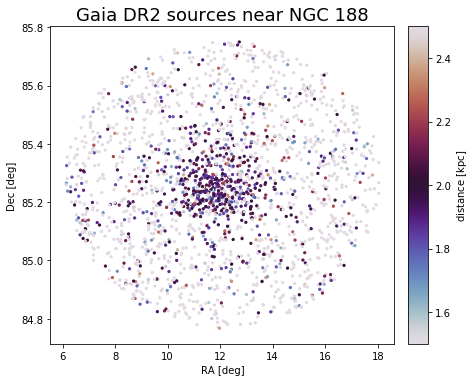

In [18]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 5.2),
                       constrained_layout=True)
cs = ax.scatter(ngc188_coords_3d.ra.degree,
                ngc188_coords_3d.dec.degree,c=ngc188_coords_3d.distance.kpc,
                s=5, vmin=1.5, vmax=2.5, cmap='twilight')
cb = fig.colorbar(cs)
cb.set_label(f'distance [{u.kpc:latex_inline}]')

ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')

ax.set_title('Gaia DR2 sources near NGC 188', fontsize=18)

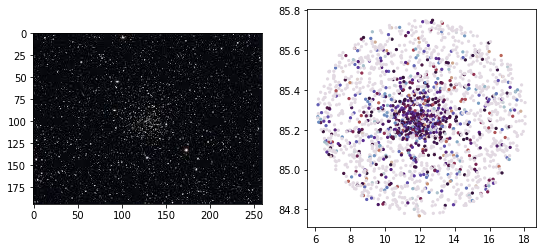

In [32]:
im=np.asarray(Image.open('download.jfif'))
fig, ax = plt.subplots(1,2,figsize=(9, 4))
ax[0].imshow(im)
ax[1].scatter(ngc188_coords_3d.ra.degree,
                ngc188_coords_3d.dec.degree,c=ngc188_coords_3d.distance.kpc,
                s=5, vmin=1.5, vmax=2.5, cmap='twilight')

In [40]:
c = SkyCoord(ra=15.9932*u.deg, dec=-10.52351344*u.deg)
print(c.ra.hourangle)
print(c.to_string('hmsdms'))
print(c.dec.to_string(sep=':', precision=5))

1.0662133333333335
01h03m58.368s -10d31m24.6484s
-10:31:24.64838


## M45

In [43]:
m45=SkyCoord.from_name('M45')

In [44]:
m45.ra

<Longitude 56.75 deg>

In [46]:
m45.dec

<Latitude 24.11666667 deg>

In [47]:
job = Gaia.cone_search_async(m45, radius=0.5*u.deg)
m45_table = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [49]:
cols = ['source_id',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag']
m45_table[cols].write('gaia_results45.fits', overwrite=True)

In [50]:
m45_table = QTable.read('gaia_results45.fits')

In [51]:
parallax_snr45 = m45_table['parallax'] / m45_table['parallax_error']
m45_table_3d = m45_table[parallax_snr45 > 10]
len(m45_table_3d)

886

In [52]:
gaia_dist45 = Distance(parallax=m45_table_3d['parallax'])

In [53]:
m45_coords_3d = SkyCoord(ra=m45_table_3d['ra'],dec=m45_table_3d['dec'],distance=gaia_dist45)

Text(0.5, 1.0, 'Gaia DR2 sources near M45')

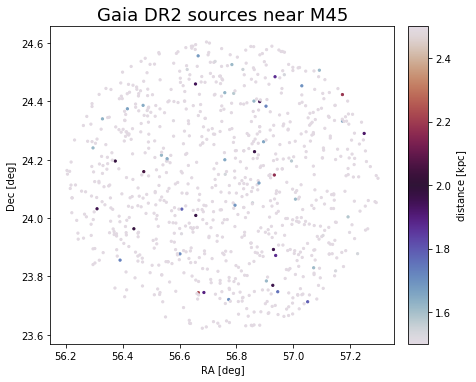

In [54]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 5.2),
                       constrained_layout=True)
cs = ax.scatter(m45_coords_3d.ra.degree,
                m45_coords_3d.dec.degree,c=m45_coords_3d.distance.kpc,
                s=5, vmin=1.5, vmax=2.5, cmap='twilight')
cb = fig.colorbar(cs)
cb.set_label(f'distance [{u.kpc:latex_inline}]')

ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')

ax.set_title('Gaia DR2 sources near M45', fontsize=18)

## convert to other coordiantes

In [3]:
c = SkyCoord(ra=15.9932*u.deg, dec=-10.52351344*u.deg)
print('Cylindrical',c.represent_as('cylindrical'))
print('Cartesian',c.represent_as('cartesian'))

Cylindrical (0.98318004, 0.279134, -0.18263903) (, rad, )
Cartesian (0.94512547, 0.27088898, -0.18263903) 


In [4]:
c.represent_as('cylindrical')

<CylindricalRepresentation (rho, phi, z) in (, rad, )
    (0.98318004, 0.279134, -0.18263903)>

In [5]:
c

<SkyCoord (ICRS): (ra, dec) in deg
    (15.9932, -10.52351344)>

In [6]:
c3 = SkyCoord(ra=15.9932 * u.deg,
              dec=-10.52351344 * u.deg,
              distance=127.4 * u.pc)

In [18]:
c3_gal = c3.galactic

In [19]:
c3_gal

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    (133.60812044, -73.13490396, 127.4)>

## Velocity Data

In [2]:
velocity_coord = SkyCoord(
    ra=10*u.deg,
    dec=20*u.deg,
    pm_ra_cosdec=1*u.mas/u.yr,
    pm_dec=2*u.mas/u.yr,radial_velocity=100*u.km/u.s)
velocity_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (10., 20.)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (1., 2., 100.)>

In [3]:
velocity_coord_gal = velocity_coord.transform_to(Galactic())
velocity_coord_gal

<SkyCoord (Galactic): (l, b) in deg
    (119.26936774, -42.79039286)
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    (1.11917063, 1.93583499, 100.)>

In [5]:
gaia_tbl = Gaia.query_object(SkyCoord.from_name('HD 219829'),
                             radius=1*u.arcmin)

In [6]:
hd219829_row = gaia_tbl[gaia_tbl['phot_g_mean_mag'].argmin()]
hd219829_row['source_id', 'pmra', 'pmdec']

source_id,pmra,pmdec
,mas / yr,mas / yr
int64,float64,float64
2661015540210781568,483.4165901889734,-114.8633971841528


In [11]:
hd219829_coord = SkyCoord(
    ra=hd219829_row['ra'],
    dec=hd219829_row['dec'],
    distance=Distance(parallax=hd219829_row['parallax']),
    pm_ra_cosdec=hd219829_row['pmra'],
    pm_dec=hd219829_row['pmdec'],
    obstime=Time(hd219829_row['ref_epoch'], format='jyear'))

AttributeError: 'numpy.float64' object has no attribute 'to_value'

In [ ]:
dss_cutout_filename = download_file(
    f"http://archive.stsci.edu/cgi-bin/dss_search?"
    f"f=FITS&ra={hd219829_coord.ra.degree}&dec={hd219829_coord.dec.degree}"
    f"&width=4&height=4")